<a href="https://colab.research.google.com/github/pooja-varadarajan/Letsgrowmore-task2/blob/main/task2%20decision%20tree%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
iris="https://raw.githubusercontent.com/kriti818/LetsGrowMore/main/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv(iris, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
dataset.species.unique()  # So we have 3 different species of iris flower.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
dataset.shape # Gives the number of rows and columns of dataset.

(150, 5)

In [16]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [18]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

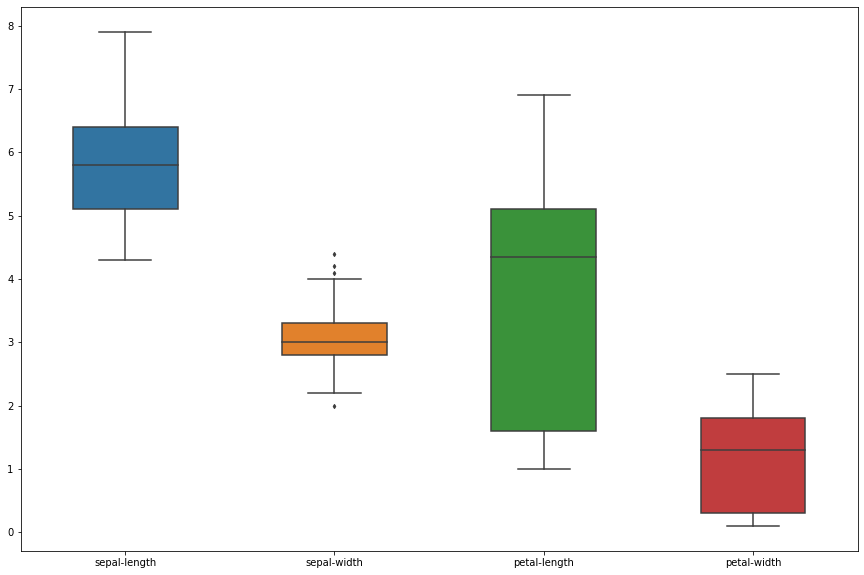

In [19]:
#Boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5, ax=ax, fliersize=3)

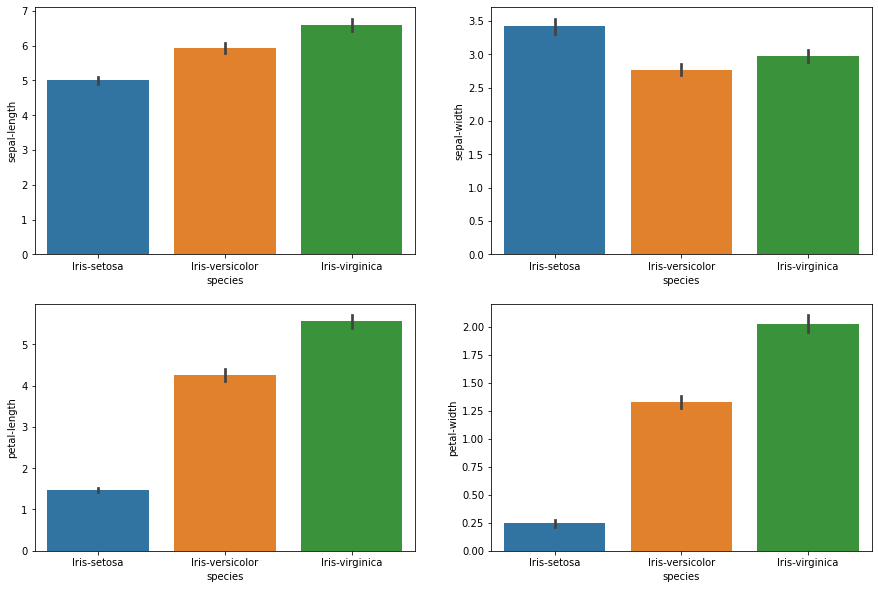

In [20]:
#Barplot 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'species', y = 'sepal-length', data=dataset)
plt.subplot(2,2,2)
sns.barplot(x = 'species', y = 'sepal-width', data=dataset)
plt.subplot(2,2,3)
sns.barplot(x = 'species', y = 'petal-length', data=dataset)
plt.subplot(2,2,4)
sns.barplot(x = 'species', y = 'petal-width', data=dataset)

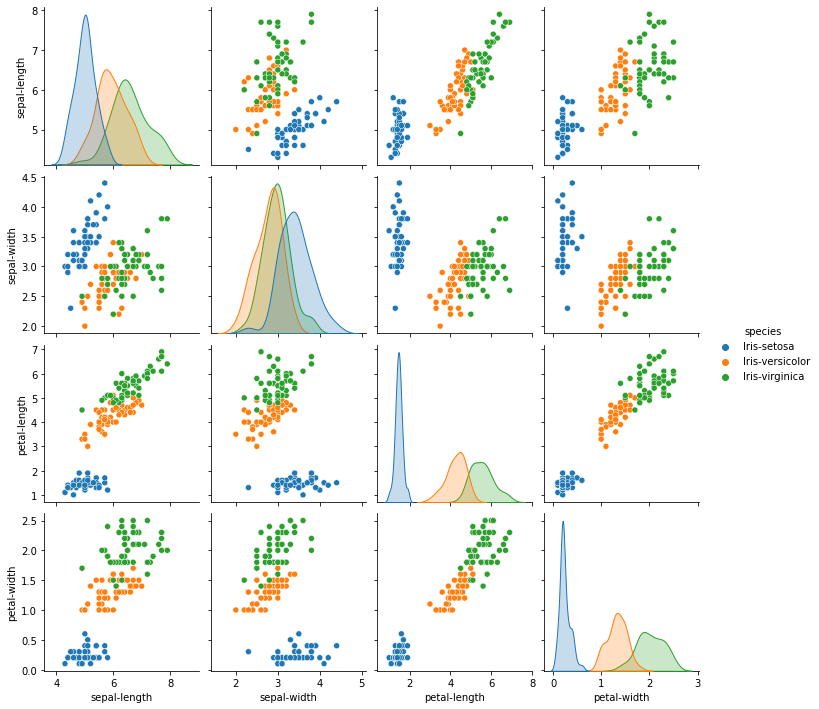

In [21]:
#Pairplot
sns.pairplot(dataset,hue='species')

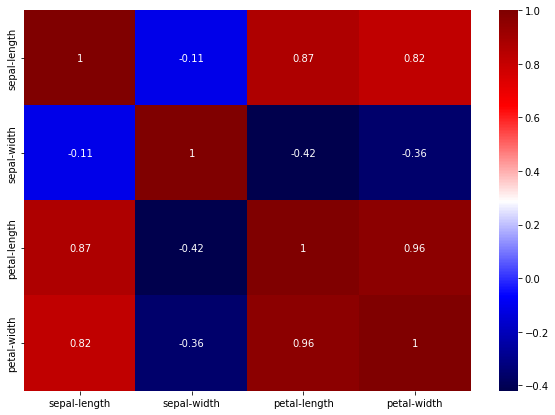

In [22]:
#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True,cmap="seismic")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # It is used to normalize labels.

In [24]:
dataset['species'] = le.fit_transform(dataset['species'])  #fit_transform: Fit label encoder and return encoded labels.
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
X_train = dataset.drop('species', axis=1)
Y_train = dataset['species']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3,random_state=100)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt=dt.fit(x_train, y_train)

In [28]:
from sklearn.metrics import accuracy_score
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))

Training Accuracy is:  100.0


In [29]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))

Test Accuracy is:  95.55555555555556


[Text(357.12, 489.24, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(267.84000000000003, 380.52000000000004, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(446.4, 380.52000000000004, 'X[3] <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(178.56, 271.8, 'X[2] <= 5.0\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(89.28, 163.08000000000004, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(267.84000000000003, 163.08000000000004, 'X[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(178.56, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(357.12, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(714.24, 271.8, 'X[2] <= 4.85\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(624.96, 163.08000000000004, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(535.6800000000001, 54.360000000000014, 'entropy = 0.0\nsamples

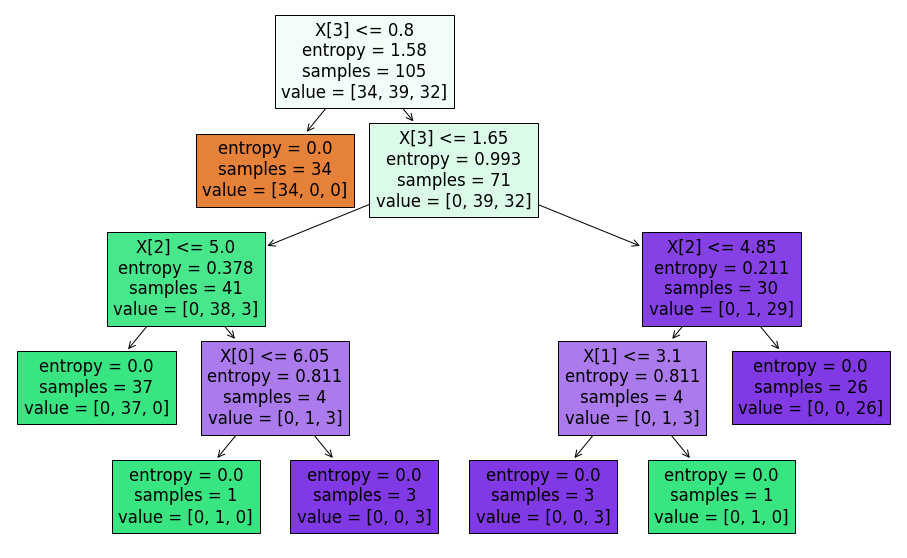

In [30]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt,filled=True)